# Import Library

In [122]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import ssl
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pickle
import gudhi
from sklearn.preprocessing import MinMaxScaler
from numpy import linalg
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import datetime
from statsmodels.tsa.stattools import acf
#import dionysus as d
from scipy.stats import kendalltau
#from mk_test import mk_test

import csv
import time as tm
import seaborn as sns
%matplotlib inline

# Download Data

In [131]:
ssl._create_default_https_context = ssl._create_unverified_context
datagrep=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# Plot Data

In [132]:
datagrep

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,171931,172205,172441,172716,172901,173047,173084,173146,173395,173659
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,269904,270164,270370,270455,270734,270947,271141,271141,271527,271563
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,263936,264054,264201,264365,264488,264603,264706,264778,264855,264936
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,37589,37589,37589,37820,37901,37958,37999,37999,37999,37999
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,98617,98638,98658,98671,98698,98701,98701,98701,98701,98741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,627956,627956,633684,636055,638172,640214,640214,640214,640214,645947
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,508,509,509,509,510,510,514,514,518,521
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11731,11736,11741,11746,11751,11751,11759,11760,11769,11771
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,311016,311194,311264,311592,311888,312118,312374,312611,312707,312750


In [133]:
countries_JH=datagrep['Country/Region'].unique().tolist()
dates_JH=list(datagrep)[4:]

In [134]:
N=[]
for c in countries_JH:
    L=datagrep[datagrep['Country/Region']==c][dates_JH].sum().values.tolist()
    N.append(L)
Data_df=pd.DataFrame(np.array(N).T).rename(columns={i:countries_JH[i] for i in range(len(countries_JH))}) 

In [135]:
Data_df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,173047,270947,264603,37958,98701,11,7435,8878486,418220,3150771,...,831950,235880,18,512947,3041506,640214,510,11751,312118,234967
765,173084,271141,264706,37999,98701,11,7437,8887973,418792,3170574,...,835346,236036,19,513427,3120301,640214,514,11759,312374,235467
766,173146,271141,264778,37999,98701,11,7437,8893568,419423,3188117,...,838341,236174,19,514315,3219177,640214,514,11760,312611,235803
767,173395,271527,264855,37999,98701,11,7437,8897178,419693,3209599,...,840511,236299,19,514315,3321005,640214,518,11769,312707,235803


In [136]:
total = Data_df.sum(axis=1)

print(total)

0            557
1            655
2            941
3           1434
4           2118
         ...    
764    431583746
765    433185357
766    434514952
767    435570464
768    436983302
Length: 769, dtype: int64


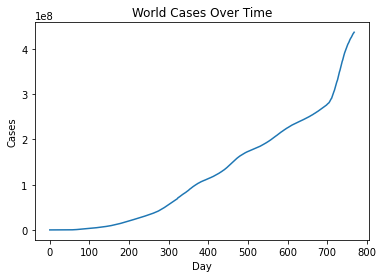

In [146]:
plt.plot(total)
plt.title('World Cases Over Time')
plt.xlabel('Day')
plt.ylabel('Cases')
plt.show()

<AxesSubplot:>

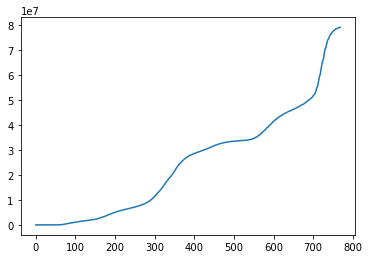

In [147]:
Data_df['US'].plot()

# Transform Data

In [174]:
datah_nc=[]
for c in countries_JH:
    L=Data_df[c].to_list()
    L1=[]
    L1.append(L[0])
    for i in range(1,len(L)-1):
        L1.append([L[i+1]-L[i] if L[i+1]-L[i]>=0 else 0][0])
    datah_nc.append(L1)  
data_nc=pd.DataFrame(np.array(datah_nc).T).rename(columns={i:countries_JH[i] for i in range(len(countries_JH))}) 
Df=data_nc.copy()

# Visualize Data

In [175]:
ts=Data_df

<AxesSubplot:>

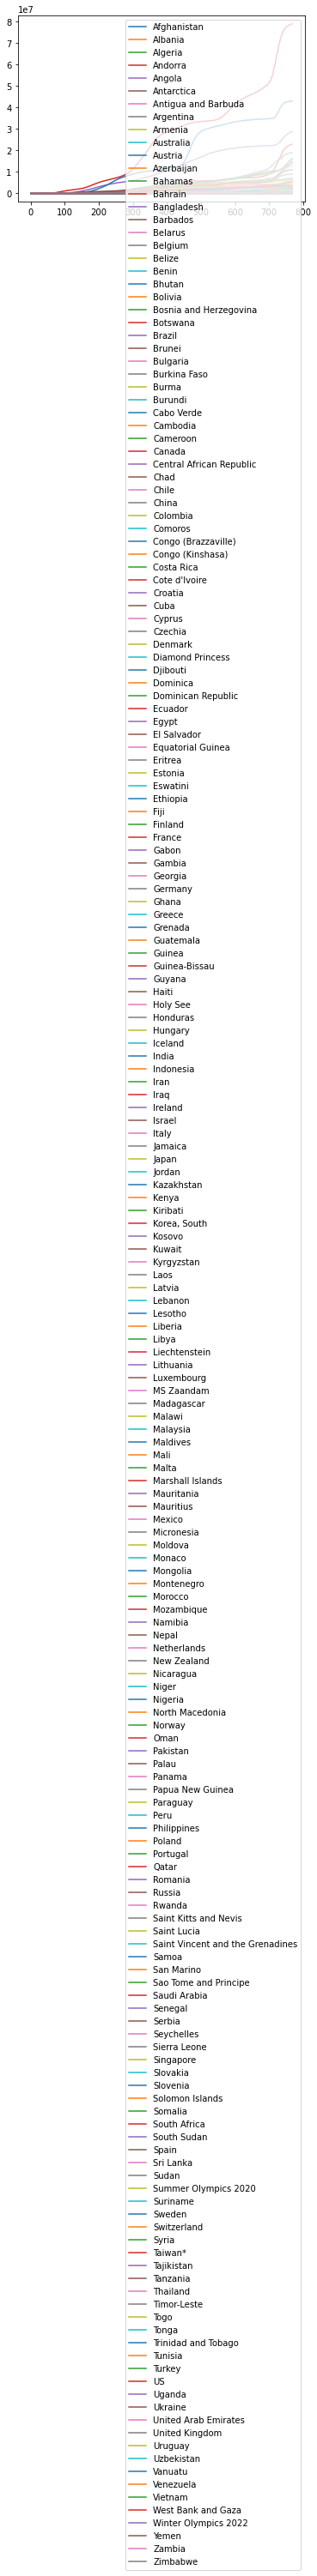

In [150]:
ts.plot()

In [151]:
ratios = np.log((ts+1) / np.roll((ts+1), -1, axis=0))[:-1]

In [152]:
ratios

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.098612,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-1.609438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.182322,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-0.000844,-0.000786,-0.000435,-0.001503,-0.000030,0.0,-0.000807,-0.001161,-0.001828,-0.008501,...,-0.004984,-0.000594,-0.171850,-0.000755,-0.022990,-0.003195,0.000000,0.000000,-0.000737,-0.001610
764,-0.000214,-0.000716,-0.000389,-0.001080,0.000000,0.0,-0.000269,-0.001068,-0.001367,-0.006265,...,-0.004074,-0.000661,-0.051293,-0.000935,-0.025577,0.000000,-0.007797,-0.000681,-0.000820,-0.002126
765,-0.000358,0.000000,-0.000272,0.000000,0.000000,0.0,0.000000,-0.000629,-0.001506,-0.005518,...,-0.003579,-0.000584,0.000000,-0.001728,-0.031196,0.000000,0.000000,-0.000085,-0.000758,-0.001426
766,-0.001437,-0.001423,-0.000291,0.000000,0.000000,0.0,0.000000,-0.000406,-0.000644,-0.006716,...,-0.002585,-0.000529,0.000000,0.000000,-0.031142,0.000000,-0.007737,-0.000765,-0.000307,0.000000


In [153]:
tsdf = pd.DataFrame(ratios)
ddin=np.array(dates_JH[:-1])
tsdf['date'] = ddin.tolist()
tsdf

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe,date
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,1/22/20
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1/23/20
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1/24/20
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-1.609438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1/25/20
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.182322,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1/26/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-0.000844,-0.000786,-0.000435,-0.001503,-0.000030,0.0,-0.000807,-0.001161,-0.001828,-0.008501,...,-0.000594,-0.171850,-0.000755,-0.022990,-0.003195,0.000000,0.000000,-0.000737,-0.001610,2/23/22
764,-0.000214,-0.000716,-0.000389,-0.001080,0.000000,0.0,-0.000269,-0.001068,-0.001367,-0.006265,...,-0.000661,-0.051293,-0.000935,-0.025577,0.000000,-0.007797,-0.000681,-0.000820,-0.002126,2/24/22
765,-0.000358,0.000000,-0.000272,0.000000,0.000000,0.0,0.000000,-0.000629,-0.001506,-0.005518,...,-0.000584,0.000000,-0.001728,-0.031196,0.000000,0.000000,-0.000085,-0.000758,-0.001426,2/25/22
766,-0.001437,-0.001423,-0.000291,0.000000,0.000000,0.0,0.000000,-0.000406,-0.000644,-0.006716,...,-0.000529,0.000000,0.000000,-0.031142,0.000000,-0.007737,-0.000765,-0.000307,0.000000,2/26/22


<AxesSubplot:>

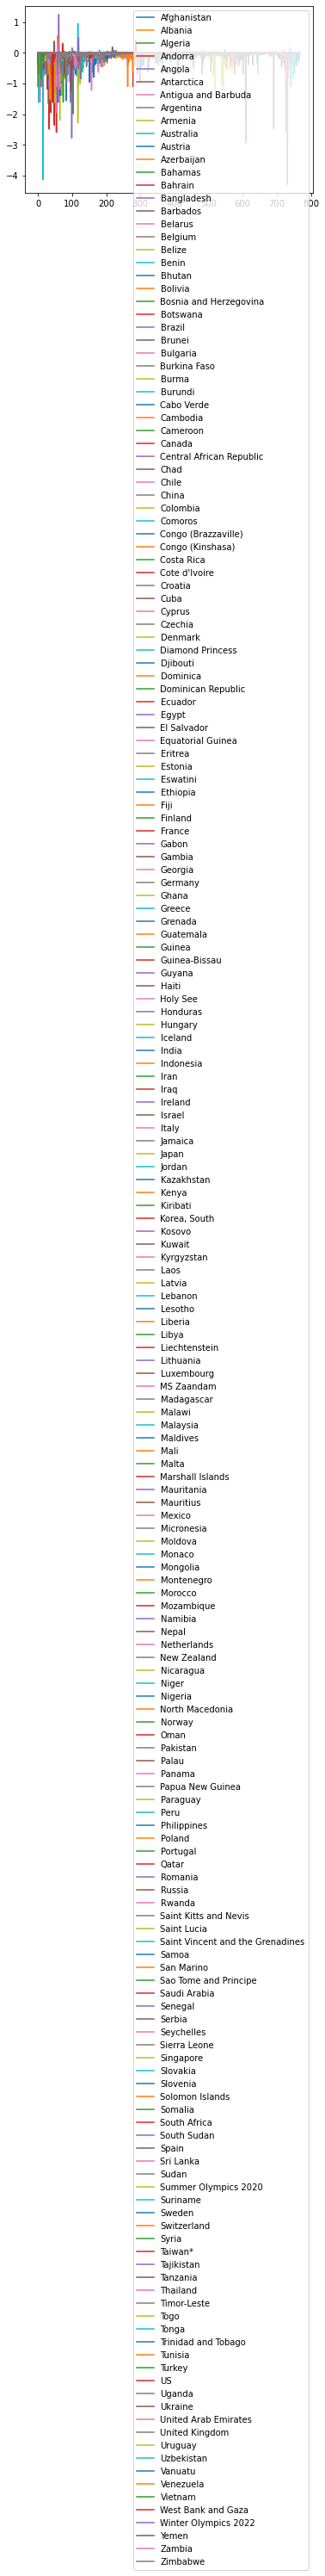

In [154]:
tsdf.plot()

In [155]:
# Persistent landscape function
def compute_persistent_landscape(dgm, k, xmin, xmax, nb_nodes, nb_ld):
    
    # Preprocessing: get the birth/death points for the dimension
    points = list(map(lambda x: x[1], filter(lambda x: x[0] == k, dgm)))
    
    landscape = np.zeros((nb_ld,nb_nodes))
    node_size = (xmax - xmin) / (nb_nodes - 1)
    for node in range(nb_nodes):
        x = xmin + node * node_size
        
        # Construct the piecewise function for this node
        lmbda_k = []
        for b, d in filter(lambda y: y[0] <= x <= y[1], points):
            if x >= (d+b)/2.0:
                lmbda_k.append(d-x)
            else:
                lmbda_k.append(x-b)
                  
        # Sort the points and add it to the landscape
        lmbda_k = np.array(list(reversed(sorted(lmbda_k))))
        for j in range(nb_ld):
            if j < len(lmbda_k):
                landscape[j,node]=lmbda_k[j]
    
    return landscape

In [156]:
def idx(date):
    return tsdf[tsdf.date == date].index.values[0]

In [157]:
w=80

index=idx('2/27/21') - w

X_n = tsdf.iloc[index:index+w].drop('date', axis=1).values


rips = gudhi.RipsComplex(points=X_n, max_edge_length=12)
simplex_tree = rips.create_simplex_tree(max_dimension=2) # Number of homological dimensions, 1 = loops, 2 = voids
dgm = simplex_tree.persistence()

nb_nodes = 100
nb_ld = 1

vals = np.array(list(map(lambda x: x[1], filter(lambda x: x[0] == 1, dgm))))
xmin = np.min(vals) - 0.001
xmax = np.max(vals) + 0.005
L = compute_persistent_landscape(dgm, 1, xmin, xmax, nb_nodes, nb_ld)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

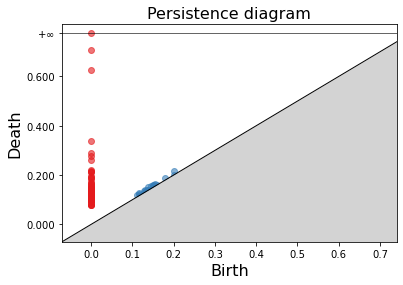

In [158]:
gudhi.plot_persistence_diagram(dgm)

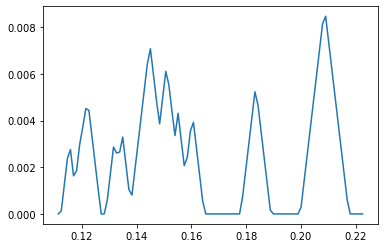

In [159]:
plt.plot(np.linspace(xmin, xmax, num=nb_nodes), L[:nb_ld,:].transpose())

In [160]:
# Compute L1 and L2 norms from the persistent landscapes
def compute_landscape_norms(start_idx, end_idx, w):
    nb_nodes = 100
    nb_ld = 1

    L1 = []
    L2 = []
    for i in range(start_idx, end_idx):
        cut = tsdf.iloc[i:i+w].drop('date', axis=1).values

        rips = gudhi.RipsComplex(points=cut, max_edge_length=12)
        tree = rips.create_simplex_tree(max_dimension=2)

        dgm = tree.persistence()

        # Get the values for only dimension 1 and compute the min and max
        vals = np.array(list(map(lambda x: x[1], filter(lambda x: x[0] == 1, dgm))))
        try:
            xmin = np.min(vals)
            xmax = np.max(vals)

            # Compute the persistent landscape
            L = compute_persistent_landscape(dgm, 1, xmin, xmax, nb_nodes, nb_ld)

            # Calculate and save the norms
            L1.append(np.linalg.norm(L, ord=1))
            L2.append(np.linalg.norm(L, ord=2))
        except:
            L1.append(0)
            L2.append(0)
        
    return np.array(L1), np.array(L2)

In [172]:
w = 80
period = 767
feb = idx('2/27/22')
start = feb - period
end = feb
L1, L2 = compute_landscape_norms(start, end, w)
min_max_scaler = MinMaxScaler()
L1 = min_max_scaler.fit_transform(L1.reshape(-1,1)).reshape(-1)
L2 = min_max_scaler.fit_transform(L2.reshape(-1,1)).reshape(-1)

Text(0.5, 0, 'Date')

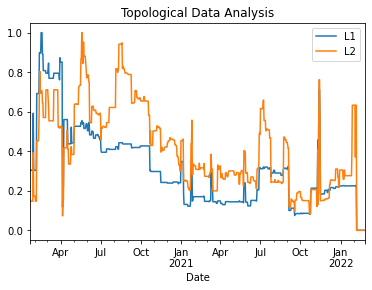

In [173]:
ndf = pd.DataFrame({'L1': L1, 'L2': L2}, index=pd.to_datetime(tsdf.iloc[start:end].date))
ndf.head()
ndf.plot()
plt.title("Topological Data Analysis")
plt.xlabel("Date")

# Appendix

In [33]:
# Visualize the landscape
def norm_graph(start, end, w, ax):
    L1, L2 = compute_landscape_norms(start, end, w)
    
    # Normalizing the landscapes
    min_max_scaler = MinMaxScaler()
    L1 = min_max_scaler.fit_transform(L1.reshape(-1,1)).reshape(-1)
    L2 = min_max_scaler.fit_transform(L2.reshape(-1,1)).reshape(-1)
    
    # ndf = norm dataframe
    ndf = pd.DataFrame({'L1': L1, 'L2': L2}, index=pd.to_datetime(tsdf.iloc[start:end].date))
    ax = ndf.L1.plot(linewidth=2.0, color='r', ax=ax)
    ax = ndf.L2.plot(linewidth=2.0, color='b', ax=ax)

    years = mdates.YearLocator()
    months = mdates.MonthLocator()
    yearsFmt = mdates.DateFormatter('%Y')

    # format the ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)

    datemin = pd.to_datetime(tsdf.iloc[start].date)
    datemax = pd.to_datetime(tsdf.iloc[end].date)
    ax.set_xlim(datemin, datemax)
    ax.set_title('Landscape Norm (w=' + str(w) + ')')
    ax.legend()
    return ax

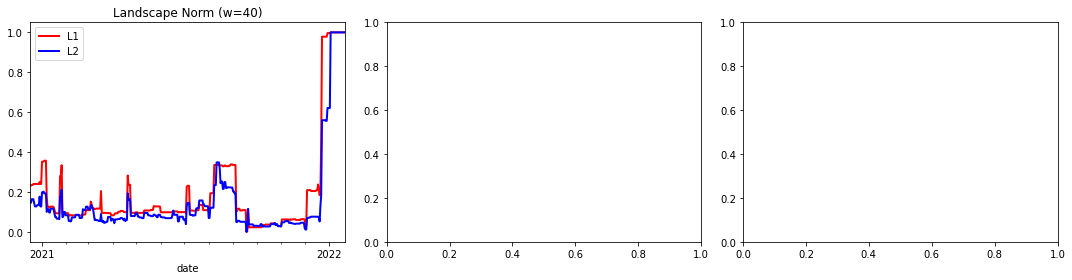

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ws = [40,80,120]
for i in range(1):
    w = ws[i]
    period = 400
    jan = idx('1/21/22')
    start = jan - period
    end = jan
    norm_graph(start, end, w, ax=axs[i])
fig.tight_layout()

In [35]:
start

330

In [36]:
end

730

In [37]:
w

40

In [38]:
L1, L2 = compute_landscape_norms(start, end, w)

In [39]:
min_max_scaler = MinMaxScaler()
L1 = min_max_scaler.fit_transform(L1.reshape(-1,1)).reshape(-1)
L2 = min_max_scaler.fit_transform(L2.reshape(-1,1)).reshape(-1)

In [40]:
ndf = pd.DataFrame({'L1': L1, 'L2': L2}, index=pd.to_datetime(tsdf.iloc[start:end].date))

In [41]:
ndf

,L1,L2
date,,
2020-12-17,0.231982,0.153167
2020-12-18,0.231982,0.145740
2020-12-19,0.234617,0.163641
2020-12-20,0.234617,0.163641
2020-12-21,0.239858,0.163582
...,...,...
2022-01-16,1.000000,1.000000
2022-01-17,1.000000,1.000000
2022-01-18,1.000000,1.000000


<AxesSubplot:xlabel='date'>

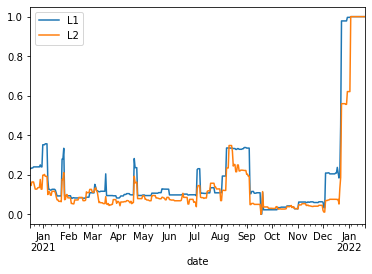

In [42]:
ndf.plot()

In [43]:
jan

730